<div style="float:left;font-size:20px;">
    <h1>Interpolation Error</h1>
</div><div style="float:right;"><img src="../assets/banner.jpg"></div>

<hr>

Investigate the interpolation error for piecewise and polynomial interpolation. Also investigate how Chebyshev grid points can reduce the interpolation error.


In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
def f(x):
    """Difficult target function to be interpolated"""
    return 1/(1  + 25*x*x)

In [4]:
def evaluate_interp(x_eval, f_true, f_interp):
    y_true = [f_true(x) for x in x_eval]
    y_interp = f_interp(x_eval)
    y_error = np.abs(y_interp - y_true)
    return y_true, y_interp, y_error

# Standard interpolation

Piecewise and polynomial interpolation for a function known to be difficult to polynomial interpolate.

In [33]:
# Generate train set
x_interp =  np.linspace(-1, 1, 14)
data = [f(xi) for xi in x_interp]

In [34]:
from scipy.interpolate import interp1d
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import RegularGridInterpolator

# Linear and cubic-spline piecewise interpolation
f_interp_lin = interp1d(x_interp, data, kind='linear')
f_interp_cubic = interp1d(x_interp, data, kind='cubic')
f_interp_bary = BarycentricInterpolator(x_interp, data)

In [35]:
# Coefficients of interpolation [(n-1), ..., (0)]
f_interp_bary.xi

array([-1.        , -0.84615385, -0.69230769, -0.53846154, -0.38461538,
       -0.23076923, -0.07692308,  0.07692308,  0.23076923,  0.38461538,
        0.53846154,  0.69230769,  0.84615385,  1.        ])

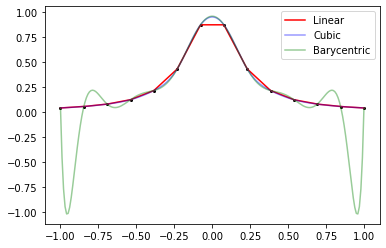

In [7]:
# Evaluate performance
x_eval = np.linspace(-1, 1, 200)

y_true, y_interp_lin, y_error_lin = evaluate_interp(x_eval, f, f_interp_lin)
y_true, y_interp_cubic, y_error_cubic = evaluate_interp(x_eval, f, f_interp_cubic)
y_true, y_interp_bary, y_error_bary = evaluate_interp(x_eval, f, f_interp_bary)

plt.scatter(x_interp, data, color='black', s=4)
plt.plot(x_eval, y_interp_lin, color='r', label='Linear')
plt.plot(x_eval, y_interp_cubic, color='b', alpha=0.4, label='Cubic')
plt.plot(x_eval, y_interp_bary, color='g', alpha=0.4, label='Barycentric')
plt.legend();

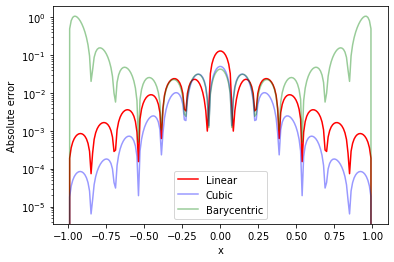

In [8]:
plt.plot(x_eval, y_error_lin, color='r', label='Linear')
plt.plot(x_eval, y_error_cubic, color='b', alpha=0.4, label='Cubic')
plt.plot(x_eval, y_error_bary, color='g', alpha=0.4, label='Barycentric')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.yscale('log')
plt.legend();

The polynomial interpolation diverges at the tails due to the Runge phenomenon. At the center of the distribution however polynomial interpolation outperforms the piecewise algorithms. Linear interpolation is generally poor for this curve, cubic interpolation works well across the whole distribution.

# Chebyshev interpolation

Experiment by fitting the same distribution, however this time with Chebysehv gridpoints.

In [9]:
def gridpoints(n, a=-1, b=1):
    """Returns Chebyshev nodes of specified dimensions.
    
    int n: Number of Chebyshev nodes
    float a: Interval minimum
    float b: Interval maximum
    
    Further reading: https://en.wikipedia.org/wiki/Chebyshev_nodes
    """
    x_i = 0.5*(b + a) + 0.5*(b - a) * np.cos( np.pi * (np.arange(1, n + 1) - 0.5)/n)
    return sorted(x_i)  

In [10]:
# Generate train set
x_interp = gridpoints(13, a=-1, b=1)
data = [f(xi) for xi in x_interp]

# Train interpolation
f_interp_lin = interp1d(x_interp, data, kind='linear')
f_interp_cubic = interp1d(x_interp, data, kind='cubic')
f_interp_bary = BarycentricInterpolator(x_interp, data)

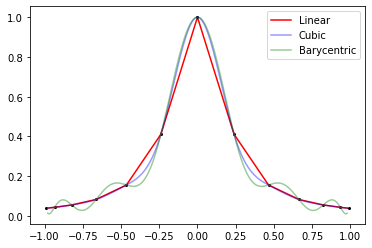

In [11]:
# Evaluate performance
x_eval = np.linspace(-0.98, 0.98, 200)

y_true, y_interp_lin, y_error_lin = evaluate_interp(x_eval, f, f_interp_lin)
y_true, y_interp_cubic, y_error_cubic = evaluate_interp(x_eval, f, f_interp_cubic)
y_true, y_interp_bary, y_error_bary = evaluate_interp(x_eval, f, f_interp_bary)

plt.scatter(x_interp, data, color='black', s=4)
plt.plot(x_eval, y_interp_lin, color='r', label='Linear')
plt.plot(x_eval, y_interp_cubic, color='b', alpha=0.4, label='Cubic')
plt.plot(x_eval, y_interp_bary, color='g', alpha=0.4, label='Barycentric')
plt.legend();

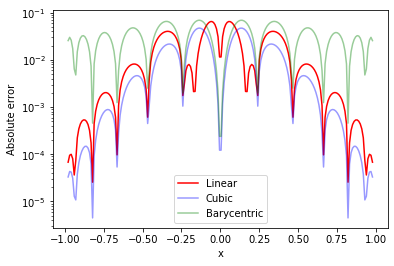

In [12]:
plt.plot(x_eval, y_error_lin, color='r', label='Linear')
plt.plot(x_eval, y_error_cubic, color='b', alpha=0.4, label='Cubic')
plt.plot(x_eval, y_error_bary, color='g', alpha=0.4, label='Barycentric')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.yscale('log')
plt.legend();

Using a Chebshev grid greatly reduces the interpolation error for polynomial interpolation. Theoretically, this is the minimum polynomial interpolation error that can be achieved for this function. The polynomial outperforms cubic piecewise across the distribution.

## Easy function Chebyshev

Apply Chebyshev interpolation for a function that is more suited for interpolation.

In [13]:
def f(x):
    """Easy target function to be interpolated"""
    return np.cos(2 * np.pi * x)

In [14]:
# Generate train set
x_interp = gridpoints(13, a=-1, b=1)
data = [f(xi) for xi in x_interp]

# Train interpolation
f_interp_lin = interp1d(x_interp, data, kind='linear')
f_interp_cubic = interp1d(x_interp, data, kind='cubic')
f_interp_bary = BarycentricInterpolator(x_interp, data)

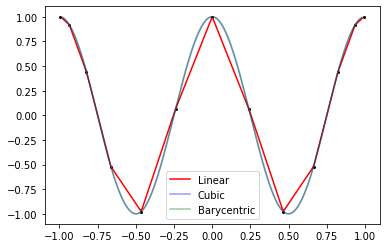

In [15]:
# Evaluate performance
x_eval = np.linspace(-0.98, 0.98, 200)

y_true, y_interp_lin, y_error_lin = evaluate_interp(x_eval, f, f_interp_lin)
y_true, y_interp_cubic, y_error_cubic = evaluate_interp(x_eval, f, f_interp_cubic)
y_true, y_interp_bary, y_error_bary = evaluate_interp(x_eval, f, f_interp_bary)

plt.scatter(x_interp, data, color='black', s=4)
plt.plot(x_eval, y_interp_lin, color='r', label='Linear')
plt.plot(x_eval, y_interp_cubic, color='b', alpha=0.4, label='Cubic')
plt.plot(x_eval, y_interp_bary, color='g', alpha=0.4, label='Barycentric')
plt.legend();

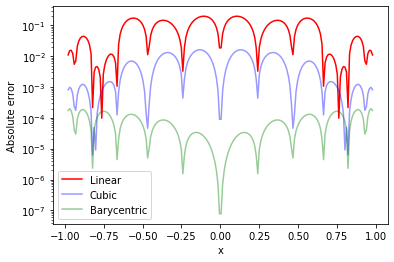

In [16]:
plt.plot(x_eval, y_error_lin, color='r', label='Linear')
plt.plot(x_eval, y_error_cubic, color='b', alpha=0.4, label='Cubic')
plt.plot(x_eval, y_error_bary, color='g', alpha=0.4, label='Barycentric')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.yscale('log')
plt.legend();

Again, polynomial interpolation performs the best. In general, if the sampling rate is sufficiently high relative to the highest frequency in the signal then an interpolating polynomial has a smaller approximation error. 

## Accuracy

Evaluate the interpolation accuracy convergence with the number of grid points. Also evaluate accuracy using linearly spaced grid points and Chebyshev points.

In [101]:
n = 10
x_interp_cheby = gridpoints(n, a=-1, b=1)
x_interp = np.linspace(-1, 1, n+1)
data_cheby = [f(xi) for xi in x_interp_cheby]
f_interp_bary_cheby = BarycentricInterpolator(x_interp_cheby, data_cheby)
f_interp_lin_cheby = interp1d(x_interp_cheby, data_cheby, kind='linear')
f_interp_cubic_cheby = interp1d(x_interp_cheby, data_cheby, kind='cubic')
_, _, y_error_bary_cheby = evaluate_interp(x_eval, f, f_interp_bary_cheby)

In [115]:
def cheby_interpolation_error(f_interp):
    """Estimate the theoretical Chebyshev error bound by assuming function is fully described by 
    the interpolating polynomial
    
    This is wrong
    """
    from scipy.misc import derivative
    from scipy.special import factorial
    n = len(f_interp.xi) 
    b = derivative(f_interp_bary_cheby, 0.0, dx=1e-6, n=n, order=41)
    error = b/(np.power(2, n)*factorial(n+1).tolist())
    return error



In [113]:
# Generate train set
n_points = np.arange(3, 40) # Range of points to evaluate accuracy over

errors_lin_cheby, errors_cubic_cheby, errors_bary_cheby = [], [], []
errors_lin, errors_cubic, errors_bary = [], [], []
#error_theory = []

for n in n_points:
    x_interp_cheby = gridpoints(n, a=-1, b=1)
    x_interp = np.linspace(-1, 1, n+1)
    data_cheby = [f(xi) for xi in x_interp_cheby]
    data = [f(xi) for xi in x_interp]

    # Train interpolation
    f_interp_lin_cheby = interp1d(x_interp_cheby, data_cheby, kind='linear')
    #f_interp_cubic_cheby = interp1d(x_interp_cheby, data_cheby, kind='cubic')
    f_interp_bary_cheby = BarycentricInterpolator(x_interp_cheby, data_cheby)
    f_interp_lin = interp1d(x_interp, data, kind='linear')
    f_interp_cubic = interp1d(x_interp, data, kind='cubic')
    f_interp_bary = BarycentricInterpolator(x_interp, data)

    # Evaluate performance
    #x_eval = np.linspace(-0.98, 0.98, 200)
    x_eval = np.linspace(np.min(x_interp_cheby), np.max(x_interp_cheby), 200)
    
    _, _, y_error_lin_cheby = evaluate_interp(x_eval, f, f_interp_lin_cheby)
    #_, _, y_error_cubic_cheby = evaluate_interp(x_eval, f, f_interp_cubic_cheby)
    _, _, y_error_bary_cheby = evaluate_interp(x_eval, f, f_interp_bary_cheby)
    _, _, y_error_lin = evaluate_interp(x_eval, f, f_interp_lin)
    _, _, y_error_cubic = evaluate_interp(x_eval, f, f_interp_cubic)
    _, _, y_error_bary = evaluate_interp(x_eval, f, f_interp_bary)
    
    errors_lin_cheby.append(np.max(np.abs(y_error_lin_cheby)))
    #errors_cubic_cheby.append(np.max(np.abs(y_error_cubic_cheby)))
    errors_bary_cheby.append(np.max(np.abs(y_error_bary_cheby)))
    errors_lin.append(np.max(np.abs(y_error_lin)))
    errors_cubic.append(np.max(np.abs(y_error_cubic)))
    errors_bary.append(np.max(np.abs(y_error_bary)))
    #error_theory.append(cheby_interpolation_error(f_interp_bary_cheby))

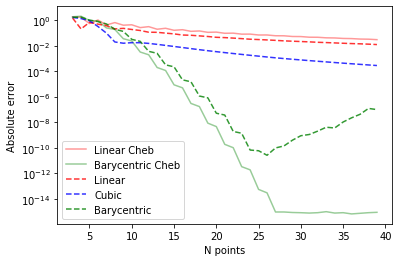

In [114]:
plt.plot(n_points, errors_lin_cheby, color='r', alpha=0.4, label='Linear Cheb')
#plt.plot(n_points, errors_cubic_cheby, color='b', alpha=0.4, label='Cubic Cheb')
plt.plot(n_points, errors_bary_cheby, color='g', alpha=0.4, label='Barycentric Cheb')
plt.plot(n_points, errors_lin, color='r', alpha=0.8, label='Linear', ls='--')
plt.plot(n_points, errors_cubic, color='b', alpha=0.8, label='Cubic', ls='--')
plt.plot(n_points, errors_bary, color='g', alpha=0.8, label='Barycentric', ls='--')
#plt.plot(n_points, error_theory, color='y', alpha=0.8, label='Theory', ls='--')
plt.xlabel('N points')
plt.ylabel('Absolute error')
plt.yscale('log')
plt.legend();

__Chebshev points__
- For piecewise interpolation, Chebshev points gives worse performance for lower numbers of grid points as piecewise approximates over larger ranges.
- Polynomial interpolation is much better, without Chebshev points the error increases around 25 points as ringing starts to occur.

__Piecewise vs Polynomial__
- Linear interpolation is generally poor, only gets to a precision of 10^-1
- Cubic interpolation is slightly better however ony gets to a precision of 10^-3
- Polynomial interpoation rapidly improves in accuracy, better by nine points and eventually getting to ~machine precision < 10^-14.


## Efficiency

Evaluate difference in terms of computational time.

In [20]:
n = 10000000
x = gridpoints(n, a=-1, b=1)

In [21]:
%timeit y = f_interp_lin_cheby(x_eval)

25.8 µs ± 45 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%timeit y = f_interp_cubic(x_eval)

56.8 µs ± 175 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit y = f_interp_bary_cheby(x_eval)

97 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


- The evaluation time of interpolation function is independent of the number of evaluations.
- Polynomial interpolation (0.9ms) is slightly slower than cubic interpolation (0.6ms)